The flowers dataset consists of images of flowers with 5 possible class labels.

When training a machine learning model, we split our data into training and test datasets. We will train the model on our training data and then evaluate how well the model performs on data it has never seen - the test set.

Let's download our training and test examples (it may take a while) and split them into train and test sets.

Run the following two cells:

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 50
CHANNELS = 3

In [8]:
!unzip '/content/drive/MyDrive/Data-Science/Project/Flower/Flower Dataset.zip'

Archive:  /content/drive/MyDrive/Data-Science/Project/Flower/Flower Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  i

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/flowers',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4317 files belonging to 5 classes.


In [10]:
class_name = train_ds.class_names
class_name

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [12]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

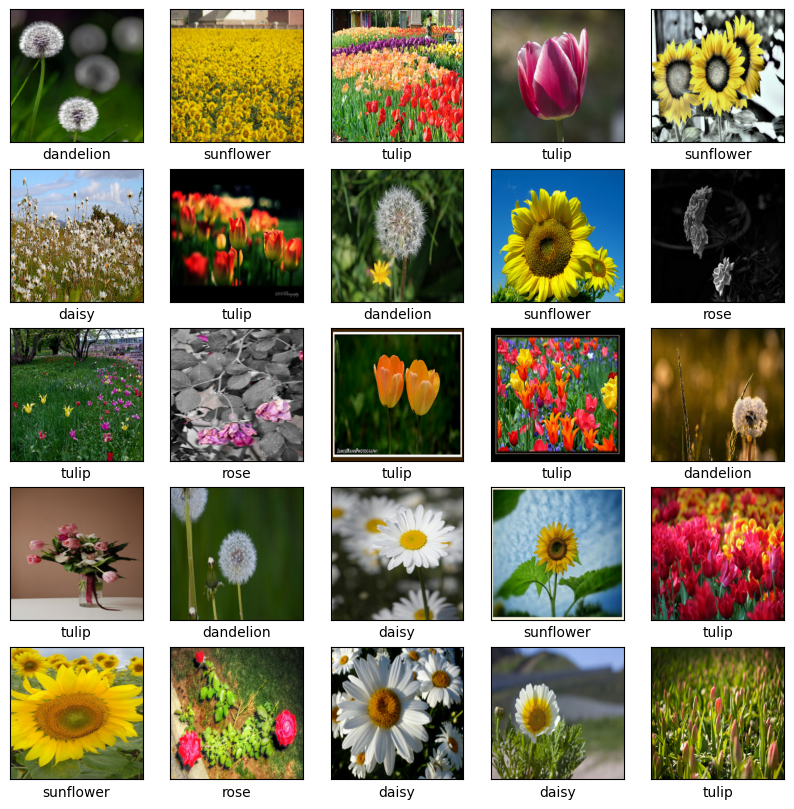

In [17]:
plt.figure(figsize = (10,10) )
for image_batch, label_batch in train_ds.take(1):
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    # plt.title(class_name[label_batch[i]])
    plt.xlabel(class_name[label_batch[i]])
    # plt.axis('off')
    plt.xticks([])
    plt.yticks([])


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/flowers',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
# dataset = dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# Define the model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_name)
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split the dataset into training, validation, and test sets
dataset_size = len(dataset)
val_size = int(dataset_size * 0.2)
test_size = int(val_size * 0.1)

test_ds = dataset.take(test_size)
remaining_ds = dataset.skip(test_size)
val_ds = remaining_ds.take(val_size)
train_ds = remaining_ds.skip(val_size)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=70,
    batch_size=BATCH_SIZE,
    verbose=2
)


Found 4317 files belonging to 5 classes.
69/69 - 12s - 181ms/step - accuracy: 0.3901 - loss: 1.3557 - val_accuracy: 0.4976 - val_loss: 1.2419


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_name)
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])


model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=70,
    batch_size=BATCH_SIZE,
    validation_data=(test_images, test_labels),
    verbose=2
)

Epoch 1/70
108/108 - 14s - loss: 1.3892 - accuracy: 0.3848 - val_loss: 1.2068 - val_accuracy: 0.4262 - 14s/epoch - 126ms/step
Epoch 2/70
108/108 - 5s - loss: 1.1645 - accuracy: 0.4858 - val_loss: 1.0870 - val_accuracy: 0.5099 - 5s/epoch - 50ms/step
Epoch 3/70
108/108 - 5s - loss: 1.0860 - accuracy: 0.5634 - val_loss: 0.9414 - val_accuracy: 0.6214 - 5s/epoch - 48ms/step
Epoch 4/70
108/108 - 5s - loss: 1.0174 - accuracy: 0.5992 - val_loss: 0.9252 - val_accuracy: 0.6423 - 5s/epoch - 49ms/step
Epoch 5/70
108/108 - 6s - loss: 0.9905 - accuracy: 0.6146 - val_loss: 0.8898 - val_accuracy: 0.6551 - 6s/epoch - 52ms/step
Epoch 6/70
108/108 - 5s - loss: 0.9228 - accuracy: 0.6447 - val_loss: 0.8170 - val_accuracy: 0.6702 - 5s/epoch - 49ms/step
Epoch 7/70
108/108 - 6s - loss: 0.8968 - accuracy: 0.6499 - val_loss: 0.8516 - val_accuracy: 0.6678 - 6s/epoch - 51ms/step
Epoch 8/70
108/108 - 5s - loss: 0.8736 - accuracy: 0.6591 - val_loss: 0.8146 - val_accuracy: 0.6783 - 5s/epoch - 48ms/step
Epoch 9/70
10

In [ ]:
history = model.fit(
    train_ds,
    epochs = 70,
    batch_size = BATCH_SIZE,
    verbose = 2
)

Epoch 1/70
87/87 - 33s - loss: 1.3400 - accuracy: 0.3991 - 33s/epoch - 376ms/step
Epoch 2/70
87/87 - 7s - loss: 1.1093 - accuracy: 0.5249 - 7s/epoch - 81ms/step
Epoch 3/70
87/87 - 7s - loss: 1.0298 - accuracy: 0.5738 - 7s/epoch - 81ms/step
Epoch 4/70
87/87 - 7s - loss: 0.9671 - accuracy: 0.6189 - 7s/epoch - 81ms/step
Epoch 5/70
87/87 - 7s - loss: 0.9361 - accuracy: 0.6298 - 7s/epoch - 82ms/step
Epoch 6/70
87/87 - 7s - loss: 0.8675 - accuracy: 0.6602 - 7s/epoch - 81ms/step
Epoch 7/70
87/87 - 7s - loss: 0.8468 - accuracy: 0.6688 - 7s/epoch - 81ms/step
Epoch 8/70
87/87 - 7s - loss: 0.8046 - accuracy: 0.6829 - 7s/epoch - 81ms/step
Epoch 9/70
87/87 - 7s - loss: 0.8000 - accuracy: 0.6864 - 7s/epoch - 82ms/step
Epoch 10/70
87/87 - 7s - loss: 0.7552 - accuracy: 0.7035 - 7s/epoch - 82ms/step
Epoch 11/70
87/87 - 7s - loss: 0.7464 - accuracy: 0.6956 - 7s/epoch - 82ms/step
Epoch 12/70
87/87 - 7s - loss: 0.7132 - accuracy: 0.7183 - 7s/epoch - 82ms/step
Epoch 13/70
87/87 - 7s - loss: 0.7114 - accura

### Save Model

In [24]:
# model_json = model.to_json()
# with open("flower.json", "w") as json_file:
#     json_file.write(model_json)

# model.save_weights("flower.h5")
# print("Saved model to disk")

In [23]:
model_json = model.to_json()
with open("flower.json", "w") as json_file:
    json_file.write(model_json)

# Change the filename to end with '.weights.h5'
model.save_weights("flower.weights.h5")
print("Saved model to disk")

Saved model to disk


### Model Testing

In [27]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image

ImagePath = '/content/drive/MyDrive/Data-Science/Project/Flower/rose.jpg'
test_image = image.load_img(ImagePath,target_size = (256, 256))
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image,axis=0)

result = model.predict(test_image,verbose=0)

# print(training_set.class_indices)
print(result)
# print('####'*10)

print(np.argmax(result))
print('Prediction is: ',class_name[np.argmax(result)])

[[1.6325820e-04 4.2537768e-06 6.9613606e-01 1.9571591e-05 3.0367678e-01]]
2
Prediction is:  rose


In [28]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image

ImagePath = '/content/drive/MyDrive/Data-Science/Project/Flower/tulip.jpg'
test_image = image.load_img(ImagePath,target_size = (256, 256))
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image,axis = 0)

result = model.predict(test_image,verbose = 0)

# print(training_set.class_indices)

print('####'*10)

print(np.argmax(result))
print('Prediction is: ',class_name[np.argmax(result)])

########################################
1
Prediction is:  dandelion


In [29]:
def model_predict(x):
  import numpy as np
  from tensorflow.keras.preprocessing import image

  ImagePath = x
  test_image = image.load_img(ImagePath,target_size = (256, 256))
  test_image = image.img_to_array(test_image)

  test_image = np.expand_dims(test_image,axis = 0)

  result = model.predict(test_image,verbose = 0)

  print('####'*10)

  return class_name[np.argmax(result)]

In [ ]:
testing = ['/content/drive/MyDrive/Data-Science Edureka/Project/Flower/daisy.jpeg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/rose.jpg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/sunflower.jpeg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/dandelion.jpg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/IMG20230328201602.jpg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/tulip.jpg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/red-roses.jpg']

for i in testing:
  print(model_predict(i))

########################################
daisy
########################################
rose
########################################
sunflower
########################################
dandelion
########################################
rose
########################################
tulip
########################################
rose
